In [5]:
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import sys
sys.path.insert(0, '../../base_codes')
sys.path.insert(0, '../../data_specific_codes')
sys.path.insert(0, '../../utility_codes')

from RE_init import *
from main_functions import *
from utility_functions import *
from SDDb_utility_functions import *

#%load_ext autoreload
%reload_ext autoreload
%autoreload 2

based_dir = ''
file_input_postfix = ".csv"
input_name_prefix = 'SDDb_car'#_relations_-1'#_filter(car)'
file_input_name = input_name_prefix + file_input_postfix



DATA_SET = 'sddb-car'
#output_dir = ""
#based_dir = based_dir + output_dir

def read_df_rel(based_dir, file_input_name):
    file_input = "SSDb_car.csv"
    print file_input
    ff = open(file_input)
    delim=","
    df = pd.read_csv(file_input,delimiter=delim,header=0)        
    return df

df_rels = read_df_rel(based_dir, file_input_name)

SSDb_car.csv


In [3]:
ls

Car_Dreams/
Entity_detection_and_clustering.ipynb*
Evaluation_on_manually_tagged_dreams.ipynb*
Robot_Dreams/
SDDb_car_filter(car)_relations_-1.xlsx
SDDb_car_filter(car)_relations_-1.xlsx (1).gsheet
SDDb_car_filter(car)_relations_-1.xlsx.gsheet
SDDb_car_filter(car)_rels_aggregated.csv
SDDb_car_filter(car)_subjobj_entity_rankings.csv
SDDb_car_manual_reading - Copy.xlsx
SDDb_car_manual_reading.xlsx
SDDb_car_relations_-1.csv
SDDb_car_subjobj_entity_rankings.csv
SDDb_utility_functions.py*
SDDb_utility_functions.pyc*
SSDb_car.csv
SSDb_car.csv.gsheet
Sleep_and_Dream_Database_All_Results.csv
Sleep_and_Dream_Database_All_Results.csv.gsheet
Sleep_and_Dream_Database_All_Results.html
Untitled.ipynb*
__init__.py*
crawl_html_text_to_csv.ipynb*
data.pickle*
dream_reports_clustering.ipynb*
excluding_one_mention_cars.ipynb*
topic_modeling.ipynb*
ward_clusters.png*
~$SDDb_car_manual_reading.xlsx


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
'''
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
'''             

ImportError: cannot import name __check_build

In [12]:
text_col_name = "sentence"#"text" #"sentence"
len(df_rels)

2709

In [4]:
print len(df_rels.drop_duplicates())
print len(df_rels[df_rels.duplicated()])
#df_rels.drop_duplicates(subset=["text"], inplace=True)
#df_rels[np.logical_and(df_rels["post_num"]==144, df_rels["sentence_num"]==12)]["sentence"].iloc[0]

27290
26


In [5]:
#documents = df_rels[text_col_name]#[0:1000]

df_rels = df_rels[df_rels.apply(lambda x: is_any_entities_present((x["arg1"]+" "+x["rel"]+ " "+ x["arg2"]).replace("{","").replace("}",""), ["car", "cars", "suv", "jeep"]), axis=1)]
df_rels.drop_duplicates(subset = ["post_num", "sentence_num", "sentence"], inplace = True)
try:
    df_rels.reset_index(inplace=True)
except:
    pass
documents = df_rels[text_col_name]


print len(documents)
#documents = df_rels[df_rels[text_col_name].str.contains("accident")][text_col_name]#[0:1000]
#print len(documents)

1195


In [6]:
vectorizer = TfidfVectorizer(stop_words='english', sublinear_tf=True, use_idf=True, 
                            max_features=200000, max_df=0.9)#, ngram_range=(1,3))
X = vectorizer.fit_transform(documents)

In [7]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=123)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [8]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
info_str = ""
for i in range(true_k):
    print "Cluster %d:" % i,
    info_str += "Cluster " + str(i)
    clus_number = i
    one_clus_indices = np.where(model.labels_ == clus_number)[0]
    print "Number of documents: ", len(one_clus_indices), " (", float(len(one_clus_indices))/len(model.labels_), "%)"
    info_str += " Number of documents: " + str(len(one_clus_indices)) + " (" + str(float(len(one_clus_indices))/len(model.labels_)) + "%)\n"
    for ind in order_centroids[i, :15]:
        print ' %s -' % terms[ind],
        info_str += str(terms[ind]) + " "
    print
    info_str += "\n"

Top terms per cluster:
Cluster 0: Number of documents:  556  ( 0.465271966527 %)
 parked -  lot -  did -  control -  just -  parking -  time -  think -  door -  guy -  going -  hit -  took -  lost -  old -
Cluster 1: Number of documents:  143  ( 0.119665271967 %)
 driving -  seat -  passenger -  road -  dream -  mother -  going -  point -  people -  mom -  later -  freeway -  looking -  wife -  fast -
Cluster 2: Number of documents:  80  ( 0.0669456066946 %)
 cars -  going -  driving -  street -  people -  line -  way -  stop -  hit -  water -  blocking -  big -  traffic -  trade -  lane -
Cluster 3: Number of documents:  101  ( 0.0845188284519 %)
 like -  house -  just -  outside -  way -  far -  stopped -  mom -  stop -  suv -  going -  went -  dream -  red -  driving -
Cluster 4: Number of documents:  81  ( 0.0677824267782 %)
 got -  drove -  stopped -  started -  went -  home -  took -  dad -  later -  picked -  hillary -  seat -  leave -  sitting -  alright -
Cluster 5: Number of 

In [145]:
df_rels["cluster_number"] = model.labels_
#df_rels.to_csv(based_dir + input_name_prefix + "_with_cluster_tags_TFsublnFalse_k"+ str(true_k) +".xlsx", index=False)
writer = pd.ExcelWriter(based_dir + input_name_prefix + "_with_cluster_tags_k"+ str(true_k) +".xlsx")
df_rels.to_excel(writer,'Sheet1')
df_info = pd.DataFrame([info_str])
df_info.to_excel(writer,'Sheet2')
writer.save()

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(true_k):
    print "Cluster %d:" %i
    print "Top terms: ",
    for ind in order_centroids[i, :15]:
        print ' %s' % terms[ind],
    print 
    clus_number = i
    one_clus_indices = np.where(model.labels_ == clus_number)[0]
    print "Number of documents in this cluster: ", len(one_clus_indices), " (", float(len(one_clus_indices))/len(model.labels_), "%)\n"

    one_clus_docs = df_rels[text_col_name][one_clus_indices]

    sample_doc = one_clus_docs.sample(5, random_state=10)
    
    for ind, d in enumerate(sample_doc):
        print ind, "  :  ", d
        
    #"""
     
    df_rels_per_cluster = df_rels.iloc[one_clus_indices].reset_index(drop=True)
    
    ##to get its relations
    #df_rels
    
    #'''
    df_extractions_rankings = get_top_extractions(df_rels_per_cluster, 
                    output_file=based_dir+ input_name_prefix+ '_subjobj_extractions_' + 'cluster_'+ str(i) +'.csv'
                 , top_num=10, save_to_file=False, stem_rels=True, just_head_arg=True)
    print_full(df_extractions_rankings)    
    #'''
    
    df_rels_rankings = get_top_relations(df_rels_per_cluster, 
                    output_file=based_dir+ input_name_prefix+ '_subjobj_relations_' + 'cluster_'+ str(i) +'.csv'
                 , top_num=27, save_to_file=False, stem_rels=True)
    print_full(df_rels_rankings)
    
    df_entity_rankings = get_top_entities(df_rels_per_cluster, 
                 #output_file='../../../../data/GoodReads/Hobbit-Pronoun_subjobj_entity_rankings.csv'
                    output_file=based_dir+ input_name_prefix+ '_subjobj_entity_rankings_'+ 'cluster_'+ str(i) +'.csv'
                 , top_num=10, save_to_file=False, just_head_arg=True)

    print_full(df_entity_rankings)
    #"""
    print "\n-----\n"

Cluster 0:
Top terms:   parked  lot  did  control  just  parking  time  think  door  guy  going  hit  took  lost  old
Number of documents in this cluster:  556  ( 0.465271966527 %)

0   :   At first I lock the door of the car.
1   :   Uddhava gave our blue car to Bhajahari to use in emergencies.
2   :   I found some guy who was an employee of the company and tried to convince him that if he talked to the boss, they'd let me return the car and pay for it without getting into trouble.
3   :   Then I was helping someone pack their car or something.
4   :   We did not have a car, so we took a sky bus with a surprisingly friendly driver.
            relation tuple  counts
0         {I};{have};{car}      14
1          {I};{see};{car}      12
2          {I};{put};{car}       6
3         {I};{rent};{car}       6
4         {I};{park};{car}       5
5         {I};{take};{car}       5
6        {I};{open};{door}       4
7  {I};do not {have};{car}       4
8         {I};{push};{car}       3
9     {I}

In [43]:
from nltk.corpus import wordnet as wn
wordnet.synsets('accident') 

[Synset('accident.n.01'), Synset('accident.n.02')]

### Hierarchical Clustering

0.0713867330502


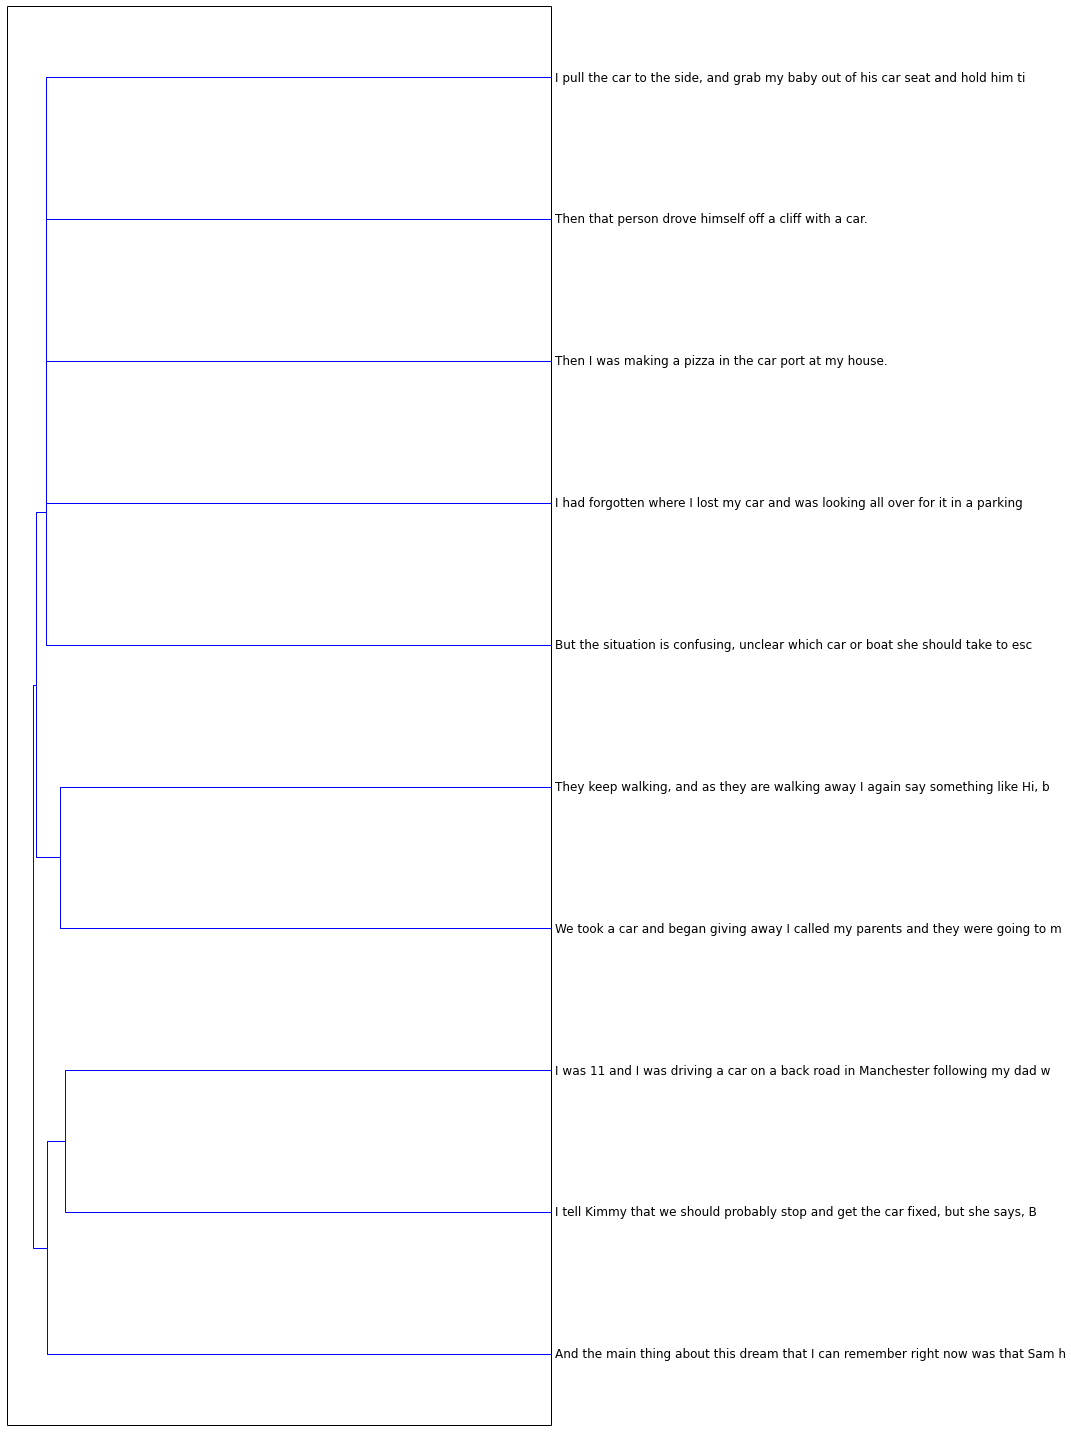

In [134]:
%matplotlib inline
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

text_col_name = "sentence"
df_relations = read_df_rel(based_dir, 'SDDb_car_clean_relations_-1.csv')

#df_relations_car = df_relations[df_relations.apply(lambda x: is_any_entities_present(x[text_col_name], ["car", "cars", "suv", "jeep"]), axis=1)]
#df_relations_car.drop_duplicates(subset=text_col_name, inplace=True)
df_relations_car = df_relations[df_relations.apply(lambda x: is_any_entities_present((x["arg1"]+" "+x["rel"]+ " "+ x["arg2"]).replace("{","").replace("}",""), ["car", "cars", "suv", "jeep"]), axis=1)]


print (float(len(df_relations_car))/len(df_relations))

documents = df_relations_car[text_col_name][0:10]#.sample(10)

documents = df_rels[text_col_name].sample(10)
titles = [item[0:80] for item in documents.values.tolist()]
vectorizer = TfidfVectorizer(stop_words='english', sublinear_tf=True, use_idf=True, 
                            max_features=200000, max_df=0.8, ngram_range=(1,3))
X = vectorizer.fit_transform(documents)
dist = 1 - cosine_similarity(X)

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="left", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig(based_dir+'ward_clusters.png', dpi=200) #save figure as ward_clusters

In [50]:
documents.values.tolist()

['Avoiding my eyes from his private parts, I say hi.',
 'I became both startled and scared when I realized two men were coming after me.',
 'It felt as if i then left my body and was floating up towards the ceiling.',
 'And I made a joke.',
 'the trip took a couple of hours and I said I had to stop at the school again a I had forgotten my strongbows and A. had forgotten his wine.',
 'Then we decided to go get some dinner in town but realized we did not have a car so we began to walk.',
 'I felt it none of my business.',
 'As i was leaving an old lady the ticket taker was standing there, i asked if i would be able to come back, she said yes as long as i had my ticket stub.',
 'We start to run again, then all of a sudden we are crawling underneath a deck type thing in a yard.',
 "I'm scared, upset the police might have seen me in the vicinity."]

In [67]:
df_relations_car

,post_num,sentence_num,sentence,arg1,rel,arg2,type,pattern,arg1_with_pos,rel_with_pos,arg2_with_pos,arg1_prepositions,rel_prepositions,arg2_prepositions,annotation
38,1,14,A policeman halts an oncoming car that I have ...,A {policeman},{halts},an oncoming {car},SVO,"(nsubj, verb, dobj)",A-DT-1 policeman-NN-2,halts-VBZ-3,an-DT-4 oncoming-JJ-5 car-NN-6,NaN,NaN,NaN,"{'dep_parse': 'det(policeman-2, A-1)\nnsubj(ha..."
39,1,14,A policeman halts an oncoming car that I have ...,{I},have {waited},an oncoming {car},SVO,"(nsubj, verb, dobj)",I-PRP-8,have-VBP-9 waited-VBN-10,an-DT-4 oncoming-JJ-5 car-NN-6,NaN,NaN,NaN,"{'dep_parse': 'det(policeman-2, A-1)\nnsubj(ha..."
155,12,38,But the police were waiting there and they wer...,all {cars},{going} down,the {street},SVO,"(nsubj, verb, dobj)",all-DT-11 cars-NNS-12,going-VBG-13 down-RP-14,the-DT-15 street-NN-16,NaN,NaN,NaN,"{'dep_parse': 'det(police-3, the-2)\nnsubj(wai..."
297,17,10,"But first, he was driving me in his car and he...",{he},was {driving} <<{me}>> in,his {car},SV(O)P,"(nsubj, verb, (O)prep)",he-PRP-4,was-VBD-5 driving-VBG-6,NaN,NaN,NaN,NaN,"{'dep_parse': 'dep(driving-6, first-2)\nnsubj(..."
384,24,6,I offered him that he could siphon the gas out...,{he},could {siphon} out <<the {gas}>> from,my {car},SV(O)P,"(nsubj, verb, (O)prep)",he-PRP-5,could-MD-6 siphon-VB-7 out-RP-10,NaN,NaN,NaN,NaN,"{'dep_parse': 'nsubj(offered-2, I-1)\nroot(ROO..."
395,25,15,He had some sort of problem with one of his pl...,{he},should {get},my {car},SVO,"(nsubj, verb, dobj)",he-PRP-20,should-MD-21 get-VB-22,my-PRP$-23 car-NN-24,NaN,NaN,NaN,"{'dep_parse': 'nsubj(had-2, He-1)\nroot(ROOT-0..."
396,25,16,"I also needed my car for something, so I did n...",{I},also {needed},my {car},SVO,"(nsubj, verb, dobj)",I-PRP-1,also-RB-2 needed-VBD-3,my-PRP$-4 car-NN-5,NaN,REASON: prep_for TEXT: {something} --,NaN,"{'dep_parse': 'nsubj(needed-3, I-1)\nadvmod(ne..."
397,25,16,"I also needed my car for something, so I did n...",{I},also {needed} <<my {car}>> for,{something},SV(O)P,"(nsubj, verb, (O)prep)",I-PRP-1,also-RB-2 needed-VBD-3,NaN,NaN,NaN,NaN,"{'dep_parse': 'nsubj(needed-3, I-1)\nadvmod(ne..."
398,25,16,"I also needed my car for something, so I did n...",{Jeffrey},{use},my {car},SVO,"(nsubj, verb, dobj)",Jeffrey-NNP-18,use-VB-19,my-PRP$-20 car-NN-21,NaN,NaN,NaN,"{'dep_parse': 'nsubj(needed-3, I-1)\nadvmod(ne..."
399,25,17,I explained to him that I needed the car.,{I},{needed},the {car},SVO,"(nsubj, verb, dobj)",I-PRP-6,needed-VBD-7,the-DT-8 car-NN-9,NaN,NaN,NaN,"{'dep_parse': 'nsubj(explained-2, I-1)\nroot(R..."


In [68]:
linkage_matrix

array([[  0.        ,   1.        ,   0.        ,   2.        ],
       [  6.        ,   7.        ,   0.        ,   2.        ],
       [  8.        ,  11.        ,   0.        ,   3.        ],
       [  2.        ,   5.        ,   1.41421356,   2.        ],
       [  3.        ,  13.        ,   1.41421356,   3.        ],
       [  4.        ,  14.        ,   1.41671894,   4.        ],
       [  9.        ,  15.        ,   1.43860216,   5.        ],
       [ 10.        ,  16.        ,   2.50716054,   7.        ],
       [ 12.        ,  17.        ,   3.55495016,  10.        ]])

In [70]:
help(ward)

Help on function ward in module scipy.cluster.hierarchy:

ward(y)
    Performs Ward's linkage on a condensed distance matrix.
    
    See `linkage` for more information on the return structure
    and algorithm.
    
    The following are common calling conventions:
    
    1. ``Z = ward(y)``
       Performs Ward's linkage on the condensed distance matrix ``y``.
    
    2. ``Z = ward(X)``
       Performs Ward's linkage on the observation matrix ``X`` using
       Euclidean distance as the distance metric.
    
    Parameters
    ----------
    y : ndarray
        A condensed distance matrix. A condensed
        distance matrix is a flat array containing the upper
        triangular of the distance matrix. This is the form that
        ``pdist`` returns.  Alternatively, a collection of
        m observation vectors in n dimensions may be passed as
        a m by n array.
    
    Returns
    -------
    Z : ndarray
        The hierarchical clustering encoded as a linkage matrix. See
